In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_parquet("data/extracted_features.parquet")
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
df["granularity"] = df.index.map(lambda x: x[0])

In [ ]:
df

,acf_1,acf_2,acf_3,acf_4,acf_5,acf_6,acf_7,acf_8,acf_9,adf_p,...,std,stl_resid_std,stl_seasonal_std,stl_trend_std,svd_entropy,var,wavelet_energy,best_model,no_of_datapoints,granularity
Y22913,0.719716,0.288571,0.083644,0.029903,0.012978,0.003017,0.093290,0.128824,0.022624,0.853813,...,182.511734,44.390571,6.281794,151.046319,0.541585,3.331053e+04,1.026201e+08,AutoETS,19,Y
Y22914,0.808394,0.616590,0.493805,0.361643,0.244337,0.120356,0.001437,0.097546,0.216120,0.474260,...,463.934845,34.347198,32.412720,454.381532,0.434804,2.152355e+05,8.790427e+07,AutoTheta,19,Y
Y22923,0.778702,0.566274,0.347210,0.233375,0.128217,0.067894,0.271438,0.461201,0.495337,0.012405,...,363.265717,51.155157,66.709219,338.648265,0.575353,1.319620e+05,1.801570e+08,AutoTheta,19,Y
Y22924,0.781103,0.625242,0.501115,0.325602,0.202364,0.038690,0.122989,0.211700,0.314846,0.944756,...,2142.020020,234.653996,89.311586,2066.474749,0.458871,4.588250e+06,2.610013e+09,CES,19,Y
Y22925,0.751401,0.569674,0.485675,0.396006,0.238526,0.106213,0.041784,0.136455,0.266161,0.988861,...,656.248779,102.586506,55.969935,618.805202,0.557494,4.306625e+05,3.073231e+08,AutoMFLES,19,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D588,0.999083,0.998164,0.997261,0.996351,0.995445,0.994557,0.993683,0.992808,0.991922,0.992043,...,2379.563477,30.762035,16.477814,2378.708753,0.067807,5.662322e+06,1.466718e+11,AutoETS,4754,D
D585,0.998928,0.997859,0.996823,0.995775,0.994732,0.993734,0.992766,0.991804,0.990808,0.787552,...,961.432617,19.752616,10.574575,960.739820,0.072068,9.243526e+05,5.296699e+10,AutoETS,4754,D
D2194,0.995312,0.990666,0.986006,0.981097,0.976146,0.971283,0.966446,0.961689,0.956951,0.984447,...,5966.651855,269.621391,142.237151,5947.186790,0.352580,3.560093e+07,3.277957e+11,AutoRegressive,7856,D
D2047,0.999095,0.998150,0.997420,0.996804,0.996315,0.995947,0.995654,0.995085,0.994354,0.404755,...,1853.644043,50.106472,36.317415,1851.466350,0.082642,3.435996e+06,5.200817e+11,CES,8533,D


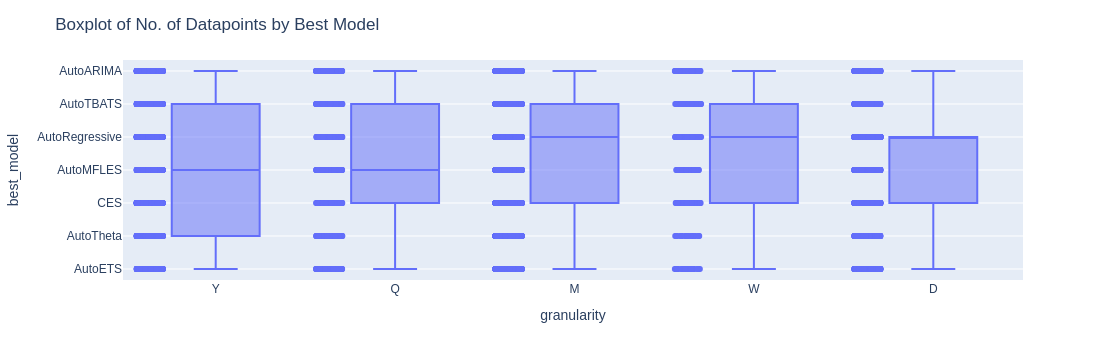

In [ ]:
import plotly.express as px

fig = px.box(df, y="best_model", x="granularity", points="all")  # Show all points
fig.update_layout(title="Boxplot of No. of Datapoints by Best Model")
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df, x="best_model", y="no_of_datapoints", points="all")  # Show all points
fig.update_layout(title="Boxplot of No. of Datapoints by Best Model")
fig.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_classif

# Select numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Drop rows with NaN values in best_model
df_clean = df.dropna(subset=["best_model"])

# Encode 'best_model' into numerical labels
df_clean["best_model_encoded"] = df_clean["best_model"].astype("category").cat.codes

# Compute ANOVA F-value for each numerical feature
f_values, p_values = f_classif(df_numeric.loc[df_clean.index], df_clean["best_model_encoded"])

# Create DataFrame with F-values
anova_results = pd.DataFrame(
    {"Feature": df_numeric.columns, "F-Value": f_values, "P-Value": p_values}
)
anova_results = anova_results.sort_values(by="F-Value", ascending=False)

# Show top correlated numerical features
print(anova_results)

                 Feature     F-Value        P-Value
9                  adf_p  942.788291   0.000000e+00
10        approx_entropy  313.519995   0.000000e+00
17                kpss_p  302.971523   0.000000e+00
14        hurst_exponent  279.418800   0.000000e+00
12                   dfa  226.981323  5.637579e-287
47      spectral_entropy  171.510250  1.050078e-216
2                  acf_3  168.461963  7.843291e-213
3                  acf_4  162.535399  2.681563e-205
1                  acf_2  161.310099  9.694960e-204
11                    cv  153.303948  1.486467e-193
4                  acf_5  126.750512  1.018588e-159
50      stl_seasonal_std  101.412538  2.309115e-127
5                  acf_6   98.015653  5.073301e-123
31                pacf_1   97.902940  7.069242e-123
6                  acf_7   97.291754  4.272431e-122
0                  acf_1   94.717609  8.347814e-119
7                  acf_8   92.675277  3.410995e-116
52           svd_entropy   84.330065  1.604615e-105
22  longest_

/home/pranav-pc/projects/ts/ts/classification/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [18 21 46] are constant.

/home/pranav-pc/projects/ts/ts/classification/.venv/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



In [ ]:
anova_results[anova_results["F-Value"] > 50]["Feature"].values

array(['adf_p', 'approx_entropy', 'kpss_p', 'hurst_exponent', 'dfa',
       'spectral_entropy', 'acf_3', 'acf_4', 'acf_2', 'cv', 'acf_5',
       'stl_seasonal_std', 'acf_6', 'pacf_1', 'acf_7', 'acf_1', 'acf_8',
       'svd_entropy', 'longest_positive_run', 'no_of_datapoints',
       'stl_trend_std', 'skewness', 'perm_entropy', 'acf_9', 'iqr',
       'num_peaks', 'mad', 'std', 'medad', 'fft_peak'], dtype=object)

/tmp/ipykernel_45221/977477060.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




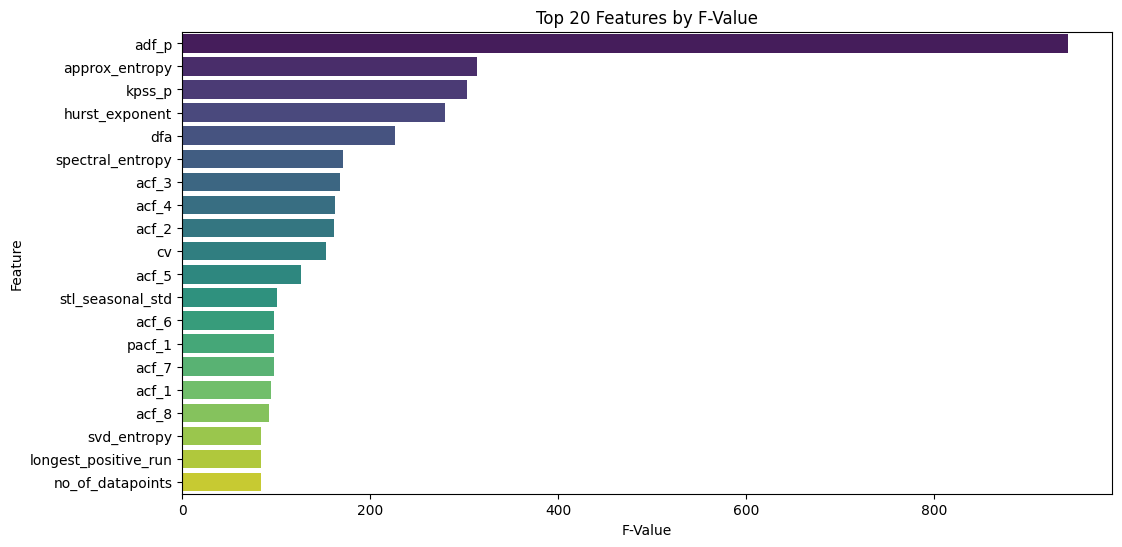

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert your data into a DataFrame (if not already)
df_fvalues = anova_results.sort_values("F-Value", ascending=False).dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=df_fvalues["Feature"].head(20), x=df_fvalues["F-Value"].head(20), palette="viridis")
plt.xlabel("F-Value")
plt.ylabel("Feature")
plt.title("Top 20 Features by F-Value")
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
df_categorical = df.select_dtypes(include=["object"])

# Encode categorical columns numerically
encoder = LabelEncoder()
df_encoded = df_categorical.apply(encoder.fit_transform)

# Compute Chi-Square test scores
chi_scores, p_values = chi2(df_encoded.drop(columns=["best_model"]), df_encoded["best_model"])

# Store results
chi_results = pd.DataFrame(
    {
        "Feature": df_encoded.columns.drop("best_model"),
        "Chi-Square Score": chi_scores,
        "P-Value": p_values,
    }
)
chi_results = chi_results.sort_values(by="Chi-Square Score", ascending=False)

print(chi_results)

       Feature  Chi-Square Score       P-Value
0  granularity        414.095302  2.604074e-86


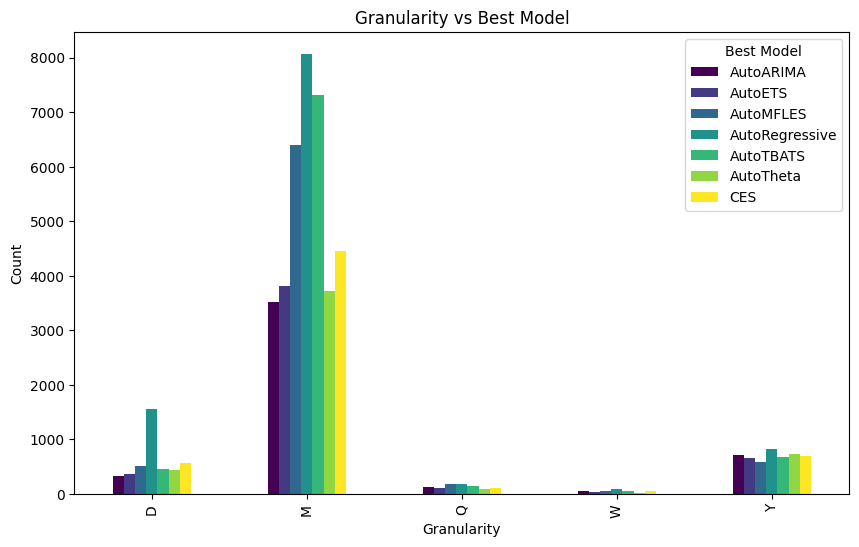

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences
cross_tab = pd.crosstab(df["granularity"], df["best_model"])

# Plot
cross_tab.plot(kind="bar", stacked=False, figsize=(10, 6), colormap="viridis")
plt.title("Granularity vs Best Model")
plt.xlabel("Granularity")
plt.ylabel("Count")
plt.legend(title="Best Model", bbox_to_anchor=(1, 1))
plt.show()